In [24]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from copy import deepcopy 
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

matplotlib.style.use('ggplot')

In [25]:
df = pd.read_csv('../multi-regress/EDA_Q4Q1store_wos.csv')

df = deepcopy(df[~df['total_housing_units'].isnull()])
df = deepcopy(df[~df['traffic_index'].isnull()])
df['total_housing_units'] = df['total_housing_units'].astype(np.int)
df= df[df['total_housing_units']!=0]
df['median_household_income'] = df['median_household_income'].astype(np.int)
df = df[df['epp_hub_OMT2']!=98]
df = df

#df = df[df['tier'].isin(['T2'])]
cat_columns = ["tier"]
df = pd.get_dummies(df, prefix_sep="_", columns=cat_columns)
#df['blueshirt_tier_T1+'] = df['blueshirt']*df['tier_T1+']
#df['blueshirt_epp_hub_OMT2'] = df['blueshirt']*df['epp_hub_OMT2']

#df = df[df['blueshirt']==1]

print('# of stores=',len(df))

#df.reset_index(inplace=True)


# of stores= 984


In [29]:
df.set_index('store_number',inplace=True)

In [30]:
len(df)

984

In [5]:
import pandas as pd
from pandas import pivot_table
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta 
df_wk = pd.read_csv('weichunh.grt.weekly_store_wos.csv')

In [6]:
table = pivot_table(df_wk, values='net_sellout_home_hub', index=['store_number'],
                    columns=['first_day_of_snapshot_week'], aggfunc='sum')

In [7]:
table


first_day_of_snapshot_week,2018-09-30,2018-10-07,2018-10-14,2018-10-21,2018-10-28,2018-11-04,2018-11-11,2018-11-18,2018-11-25,2018-12-02,...,2019-01-27,2019-02-03,2019-02-10,2019-02-17,2019-02-24,2019-03-03,2019-03-10,2019-03-17,2019-03-24,2019-03-31
store_number,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,12,0,1,2,42,18,8,...,2,0,1,1,1,1,2,2,1,0
7,0,0,0,7,3,0,2,39,10,5,...,2,1,2,2,2,0,0,2,1,0
8,0,0,0,0,1,0,3,32,0,3,...,2,1,0,1,0,1,3,0,0,0
10,0,0,0,1,2,0,2,37,3,3,...,2,1,1,1,1,0,0,0,0,0
11,0,0,0,0,1,0,1,17,4,3,...,2,0,0,0,1,0,0,1,0,1
12,0,0,0,3,5,3,2,33,10,2,...,3,1,2,1,1,1,0,1,1,0
13,0,0,0,8,7,6,2,70,14,5,...,1,0,1,2,0,2,1,1,1,0
14,0,0,0,4,2,3,2,34,8,5,...,2,1,1,0,3,0,0,0,1,0
15,0,0,0,7,4,2,4,48,9,7,...,1,0,0,1,2,0,0,1,4,1


In [8]:
sorted(df_wk.first_day_of_snapshot_week.unique().tolist())

['2018-09-30',
 '2018-10-07',
 '2018-10-14',
 '2018-10-21',
 '2018-10-28',
 '2018-11-04',
 '2018-11-11',
 '2018-11-18',
 '2018-11-25',
 '2018-12-02',
 '2018-12-09',
 '2018-12-16',
 '2018-12-23',
 '2018-12-30',
 '2019-01-06',
 '2019-01-13',
 '2019-01-20',
 '2019-01-27',
 '2019-02-03',
 '2019-02-10',
 '2019-02-17',
 '2019-02-24',
 '2019-03-03',
 '2019-03-10',
 '2019-03-17',
 '2019-03-24',
 '2019-03-31']

array(['2018-10-14', '2018-10-21', '2018-09-30', '2018-10-07'],
      dtype=object)

In [28]:
df

,store_number,store_name,traffic_index,tier_in_fixture,blueshirt,address,city,state_short,total_housing_units,total_population_in_housing_units,...,wos_home_mini_bin_3,wos_home_mini_bin_total,wos_home_max_bin_1,wos_home_max_bin_2,wos_home_max_bin_3,wos_home_max_bin_total,tier_T1,tier_T1+,tier_T2,tier_T3
0,4,BB - Minnetonka,315.410,T1+,1,13513 Ridgedale Dr,Minnetonka,MN,10186,19894.0,...,25,27,9,18,0,27,0,1,0,0
1,7,BB - Roseville,514.128,T1+,1,1647 County Road B2,Roseville,MN,18598,39777.0,...,23,27,16,8,3,27,0,1,0,0
2,8,BB - Burnsville,277.940,T3,0,14141 Aldrich Ave S,Burnsville,MN,18948,44602.0,...,25,27,12,13,2,27,0,1,0,0
3,10,BB - Maplewood,443.651,T1,0,1885 E. County Rd. D,Maplewood,MN,13653,33404.0,...,26,27,16,11,0,27,0,1,0,0
4,11,BB - Blaine,546.560,T2,0,300 Northtown Drive Ne,Blaine,MN,11835,30095.0,...,24,27,15,3,9,27,0,1,0,0
5,12,BB - St. Cloud,359.660,T2,0,4130 W. Division Street,St. Cloud,MN,12380,31296.0,...,21,27,15,12,0,27,1,0,0,0
6,13,BB - Fargo,768.570,T1,1,3902 13th Avenue South Suite 600,Fargo,ND,24876,48301.0,...,20,27,15,2,10,27,0,0,0,1
7,14,BB - Rochester,368.520,T1,1,4050 Hwy 52 N,Rochester,MN,23031,53902.0,...,25,27,10,17,0,27,0,1,0,0
8,15,BB - Oakdale,707.280,T1+,1,8301 3rd St N,Oakdale,MN,11962,28583.0,...,24,27,16,4,7,27,0,1,0,0
9,16,BB - West Des Moines,412.267,T1,0,4100 University Ave. #240,West Des Moines,IA,14021,28639.0,...,24,27,14,9,4,27,0,0,0,1


In [85]:
def stats_lm(dftmp,df_X,y):
    # stats linear regression fit on whole data  --------------------------------------------------------------------------------------------
    df_X = pd.DataFrame(StandardScaler().fit_transform(df_X),columns = df_X.columns)
#    dftmp.to_csv('dftmp.csv')
# ------------------------------------------------------------------------------------------------------------------------
#    df_X['blueshirt'] = df['blueshirt']
    df_X['grt_hub_75_off_y'] = dftmp['grt_hub_75_off_y']
#    df_X['grt_mini_90_off'] = df['grt_mini_90_off']
#    df_X['epp_home'] = df['epp_home']
#    df_X['epp_mini'] = df['epp_mini']
#    df_X['epp_max'] = df['epp_max']
#    df_X['epp_hub_OMT2'] = df['epp_hub_OMT2']
    df_X['epp_hub_OMT3'] = dftmp['epp_hub_OMT3']
#    df_X['google_connected_home_table'] = df['google_connected_home_table'] 
    df_X['google_home_meccano_ec'] = dftmp['google_home_meccano_ec']
#    df_X['tier_T1+'] = df['tier_T1+']
#    df_X['tier_T1'] = df['tier_T1']
#    df_X['tier_T3'] = df['tier_T3']
    df_X['rsas_trained'] = dftmp['rsas_trained']

# # #     df_X['train_home_hub'] = df['train_home_hub']

    #df_X['course_google_home_hub'] = df['course_google_home_hub']
# # #    df_X['wos_home_hub_bin_1'] = df['wos_home_hub_bin_1']
# # #    df_X['wos_home_hub_bin_2'] = df['wos_home_hub_bin_2']
# #    df_X['total_visits'] = df['total_visits']
#    df_X['blueshirt_tier_T1+'] = df['blueshirt_tier_T1+']

# ------------------------------------------------------------------------------------------------------------------------
    X = df_X
    X_const = sm.add_constant(X)
    
#     X_const.to_csv('zx.csv')
#     y.to_csv('zy.csv')

    model = sm.OLS(y, X_const).fit()
    predictions_train = model.predict(X_const)
    model_summary = model.summary()

    # Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
    #summary_as_html = model_summary.tables[0].as_html()
    #df_summary = pd.read_html(summary_as_html, header=0, index_col=0)[0]
    #df_summary.to_csv('q4q1-corr-rsquared-model-export.csv')
    
    summary_as_html = model_summary.tables[1].as_html()
    df_summary = pd.read_html(summary_as_html, header=0, index_col=0)[0]
    #df_summary.to_csv('q4q1-corr-coeff-model-export.csv')
#     print(df_summary.columns)
#     print(df_summary.index)
#     print(df_summary.loc['grt_hub_75_off_y','coef'])
#     print(model.summary())
#     print("\n")
    return df_summary
    # For each X, calculate VIF and save in dataframe
#     vif = pd.DataFrame()
#     vif["VIF Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
#     vif["features"] = df_X.columns
#     print(vif.round(1))

In [92]:
#start_date = '2018-09-30'
# for dd in ['2018-10-21', '2018-10-28',
#    '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
#    '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30']:

full_weeks = ['2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
       '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
       '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30', '2019-01-06',
       '2019-01-13', '2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
       '2019-02-17', '2019-02-24', '2019-03-03', '2019-03-10', '2019-03-17',
       '2019-03-24', '2019-03-31']
#df = pd.concat(list_of_dataframes)

dfs = []

for yyyymmdd in ['2018-10-21', '2018-10-28',
       '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
       '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30']:
#for yyyymmdd in ['2018-10-21']:    
    mm = str(yyyymmdd.split('-')[1])
    dd = str(yyyymmdd.split('-')[2])
    
    dftmp = df_wk[df_wk['first_day_of_snapshot_week'] <= yyyymmdd].groupby('store_number')['grt_hub_75_off'].sum()
    #eval(tmp)
    #print(len(dftmp))
    dftmp = table.merge(dftmp.to_frame(), left_index=True, right_index=True)
    #print(len(dftmp))
    #dftmp.to_csv('z1.csv')
    #df.to_csv('z2.csv')
    dftmp = df.merge(dftmp, left_index=True, right_index=True)
    dftmp.reset_index(inplace=True)
#    print(dftmp)
#    for yyyymmdd2 in ['2018-10-21', '2018-10-28',
#        '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
#        '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30']:
    index_sales_wk = []
    grt_hub_coef = []
#    for sales_wk in ['2018-10-21']:
    for sales_wk in ['2018-10-21', '2018-10-28',
        '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
        '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30']:
        if sales_wk >= yyyymmdd: 
            #print(sales_wk)
            index_sales_wk.append(sales_wk)
            y = dftmp[[sales_wk]]
#y = df[['net_sellout_mini']]
#y = df[['net_sellout_home_category']]

            df_X=deepcopy(dftmp[[
                #'blueshirt'
                   'traffic_index'
                   ,'median_household_income'
                #   ,'population_16_years_and_over_with_earnings'
                #    ,'total_housing_units'
                #   'total_population_in_housing_units'
                #    ,'inventory_home_hub'
                #    ,'wos_home_hub_bin_2'
                #   ,'total_housing_units'
               #     ,'grt_hub_75_off'
               #     ,'epp_hub_OMT3'
            #        ,'rsas_trained'
                    #,'google_connected_home_table'
                    #,'course_google_home_hub'
                    ##,'blueshirt'
                    ##,'tier_T1+'
                    #,'tier_T1'
                    #,'tier_T2'
                    #,'wos_home_hub_bin_1'
                    #,'wos_home_hub_bin_3'
                    ]])
            df_summary = stats_lm(dftmp,df_X,y)
            grt_hub_coef.append(df_summary.loc['grt_hub_75_off_y','coef'])
    df_coef = pd.DataFrame(grt_hub_coef,index = index_sales_wk, columns = ['grt_hub_75_off_'+mm+dd])
            
    #print(df_coef)

    dfs.append(df_coef.T)

df_out = pd.concat(dfs,sort=False)
df_out.to_csv('tmp.csv')

#df_out.T.plot(figsize=(10,5))

# lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks'] 
  
# # Calling DataFrame constructor on list 
# # with indices and columns specified 
# df = pd.DataFrame(lst, index =['a', 'b', 'c', 'd', 'e', 'f', 'g'], 
#                                               columns =['Names']) 

    
    
    
    
    
    
#     dftmp = dftmp.corr().drop(full_weeks,axis=0)
#     #dftmp = dftmp.drop(['2018-09-30', '2018-10-07', '2018-10-14','grt_hub_75_off'],axis=1)
#     dftmp.drop('grt_hub_75_off',axis=1,inplace=True)
#     week_idx = (full_weeks.index(yyyymmdd))
  
#     for i in range(week_idx):
#         #print(q4_q1_dates[i])
#         dftmp.drop(full_weeks[i],axis=1,inplace=True)
    
#     grt_name = 'grt_hub_75_off' + '_' + mm + '_' + dd
#     dftmp.rename(index = {"grt_hub_75_off": grt_name}, 
#                                  inplace = True)


#     dfs.append(dftmp)

# df_out = pd.concat(dfs,sort=False)
# df_out.to_csv('tmp.csv')

#df_out.T.plot(figsize=(10,5))

In [49]:
dftmp.

,store_name,traffic_index,tier_in_fixture,blueshirt,address,city,state_short,total_housing_units,total_population_in_housing_units,population_16_years_and_over_with_earnings,...,2019-02-03,2019-02-10,2019-02-17,2019-02-24,2019-03-03,2019-03-10,2019-03-17,2019-03-24,2019-03-31,grt_hub_75_off_y
store_number,,,,,,,,,,,,,,,,,,,,,
4,BB - Minnetonka,315.410,T1+,1,13513 Ridgedale Dr,Minnetonka,MN,10186,19894.0,12424.0,...,0,1,1,1,1,2,2,1,0,2
7,BB - Roseville,514.128,T1+,1,1647 County Road B2,Roseville,MN,18598,39777.0,23841.0,...,1,2,2,2,0,0,2,1,0,0
8,BB - Burnsville,277.940,T3,0,14141 Aldrich Ave S,Burnsville,MN,18948,44602.0,26800.0,...,1,0,1,0,1,3,0,0,0,0
10,BB - Maplewood,443.651,T1,0,1885 E. County Rd. D,Maplewood,MN,13653,33404.0,18864.0,...,1,1,1,1,0,0,0,0,0,0
11,BB - Blaine,546.560,T2,0,300 Northtown Drive Ne,Blaine,MN,11835,30095.0,17800.0,...,0,0,0,1,0,0,1,0,1,0
12,BB - St. Cloud,359.660,T2,0,4130 W. Division Street,St. Cloud,MN,12380,31296.0,22391.0,...,1,2,1,1,1,0,1,1,0,2
13,BB - Fargo,768.570,T1,1,3902 13th Avenue South Suite 600,Fargo,ND,24876,48301.0,31821.0,...,0,1,2,0,2,1,1,1,0,3
14,BB - Rochester,368.520,T1,1,4050 Hwy 52 N,Rochester,MN,23031,53902.0,32059.0,...,1,1,0,3,0,0,0,1,0,0
15,BB - Oakdale,707.280,T1+,1,8301 3rd St N,Oakdale,MN,11962,28583.0,17687.0,...,0,0,1,2,0,0,1,4,1,0


In [44]:
dftmp.isnull().sum().to_csv('z.csv')


In [48]:
dftmp.columns.tolist()

['store_name',
 'traffic_index',
 'tier_in_fixture',
 'blueshirt',
 'address',
 'city',
 'state_short',
 'total_housing_units',
 'total_population_in_housing_units',
 'population_16_years_and_over_with_earnings',
 'median_household_income',
 'total_visits',
 'rsas_trained',
 'unique_rsas_trained',
 'products_trained',
 'train_home',
 'train_home_hub',
 'train_home_mini',
 'train_home_max',
 'course_google_assistant',
 'course_google_home_mini_max',
 'course_google_home_hub',
 'course_smart_home',
 'course_connected_home_table',
 'table_2020',
 'chromecast_endcap',
 'google_connected_home_table',
 'google_home_meccano_ec',
 'google_tower',
 'nest__cam_inline',
 'nest__premium_family',
 'nest__premium_focus',
 'nest__secure_riser',
 'nest__standard',
 'pixel_endcap_60',
 'pixel_endcap_72',
 'pixelbook_endcap',
 'wear_os',
 'sellout_home_hub',
 'sellout_home',
 'sellout_home_mini',
 'sellout_home_max',
 'sellout_cc_audio',
 'sellout_cc_ultra',
 'sellout_cc_video2015',
 'sellout_cc_video20

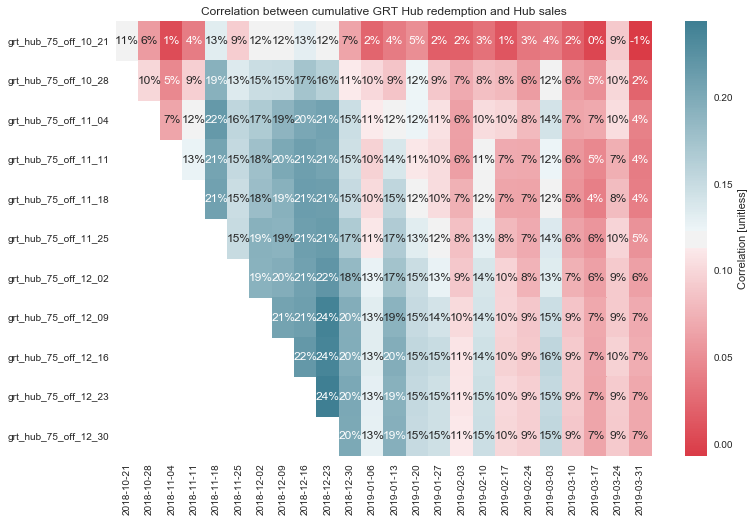

In [7]:
import seaborn as sns
sns.set(style='white')

#cmap=sns.diverging_palette(20, 220, n=200) #red to blue(top)
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.diverging_palette(10, 220, as_cmap=True)

    #sns.heatmap(corr, cmap=cmap, annot= True, center=0,
    #            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
#Cohorts: GRT redemption 
plt.figure(figsize=(12, 8))
plt.title('Correlation between cumulative GRT Hub redemption and Hub sales')
sns.heatmap(df_out, cmap=cmap, mask=df_out.isnull(), annot=True, fmt='.0%', cbar_kws={'label': 'Correlation [unitless]'});
plt.savefig('heat.png')

df_out.to_csv('corr.csv')

In [70]:
grt_10_21 = df[df['first_day_of_snapshot_week'] <= '2018-10-21'].groupby('store_number')['grt_hub_75_off'].sum()

df_10_21 = table.merge(grt_10_21.to_frame(), left_index=True, right_index=True)

corr_10_21 = df_10_21.corr().drop(['2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
       '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
       '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30', '2019-01-06',
       '2019-01-13', '2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
       '2019-02-17', '2019-02-24', '2019-03-03', '2019-03-10', '2019-03-17',
       '2019-03-24', '2019-03-31'],axis=0).drop(['2018-09-30', '2018-10-07', '2018-10-14','grt_hub_75_off'],axis=1)

corr_10_21.rename(index = {"grt_hub_75_off": "grt_hub_75_off_10_21"}, 
                                 inplace = True)
i = 0
for date in corr_10_21.columns.tolist():
    i = i + 1
    #corr_10_21.rename(columns={date:'week'+str(i)},inplace=True)
    corr_10_21.rename(columns={date:i},inplace=True)    

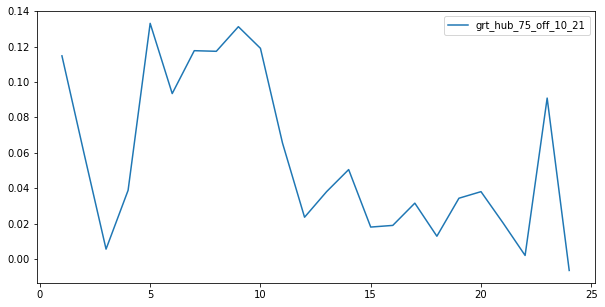

In [74]:
corr_10_21.T.plot(figsize=(10,5))

In [82]:
grt_10_28 = df[df['first_day_of_snapshot_week'] <= '2018-10-28'].groupby('store_number')['grt_hub_75_off'].sum()

df_10_28 = table.merge(grt_10_28.to_frame(), left_index=True, right_index=True)

corr_10_28 = df_10_28.corr().drop(['2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
       '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
       '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30', '2019-01-06',
       '2019-01-13', '2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
       '2019-02-17', '2019-02-24', '2019-03-03', '2019-03-10', '2019-03-17',
       '2019-03-24', '2019-03-31'],axis=0).drop(['2018-09-30', '2018-10-07', '2018-10-14','grt_hub_75_off'],axis=1)

corr_10_28.rename(index = {"grt_hub_75_off": "grt_hub_75_off_10_28"},
                                 inplace = True)
# i = 0
# for date in corr_10_28.columns.tolist():
#     i = i + 1
#     #corr_10_28.rename(columns={date:'week'+str(i)},inplace=True)
#     corr_10_28.rename(columns={date:i},inplace=True)


In [94]:
# try date in python

start_date = '2019-03-24'
date_start = datetime.strptime(start_date, "%Y-%m-%d").date()
date_end = date_start + timedelta(days=7)

print(date_end)
#print(str(datetime.now() + timedelta(days=7)))

2019-03-31


In [83]:
corr_10_28

,2018-10-21,2018-10-28,2018-11-04,2018-11-11,2018-11-18,2018-11-25,2018-12-02,2018-12-09,2018-12-16,2018-12-23,...,2019-01-27,2019-02-03,2019-02-10,2019-02-17,2019-02-24,2019-03-03,2019-03-10,2019-03-17,2019-03-24,2019-03-31
grt_hub_75_off_10_28,0.152364,0.100727,0.046898,0.094637,0.193102,0.134514,0.148698,0.148879,0.173642,0.161511,...,0.089898,0.070019,0.083797,0.079658,0.059949,0.117566,0.061318,0.051716,0.100171,0.022284


In [64]:
i = 0
for date in corr_10_21.columns.tolist():
    i = i + 1
    print(i,date)

1 2018-10-21
2 2018-10-28
3 2018-11-04
4 2018-11-11
5 2018-11-18
6 2018-11-25
7 2018-12-02
8 2018-12-09
9 2018-12-16
10 2018-12-23
11 2018-12-30
12 2019-01-06
13 2019-01-13
14 2019-01-20
15 2019-01-27
16 2019-02-03
17 2019-02-10
18 2019-02-17
19 2019-02-24
20 2019-03-03
21 2019-03-10
22 2019-03-17
23 2019-03-24
24 2019-03-31


In [60]:
corr_10_21.columns.tolist()

['2018-10-21',
 '2018-10-28',
 '2018-11-04',
 '2018-11-11',
 '2018-11-18',
 '2018-11-25',
 '2018-12-02',
 '2018-12-09',
 '2018-12-16',
 '2018-12-23',
 '2018-12-30',
 '2019-01-06',
 '2019-01-13',
 '2019-01-20',
 '2019-01-27',
 '2019-02-03',
 '2019-02-10',
 '2019-02-17',
 '2019-02-24',
 '2019-03-03',
 '2019-03-10',
 '2019-03-17',
 '2019-03-24',
 '2019-03-31']

In [34]:
df.groupby('first_day_of_snapshot_week')['net_sellout_home_hub'].sum()

first_day_of_snapshot_week
2018-09-30        0
2018-10-07        0
2018-10-14        0
2018-10-21     4075
2018-10-28     2561
2018-11-04     2208
2018-11-11     2531
2018-11-18    30549
2018-11-25     7530
2018-12-02     5261
2018-12-09    11548
2018-12-16    27992
2018-12-23    24229
2018-12-30     7291
2019-01-06     4262
2019-01-13     3191
2019-01-20     2773
2019-01-27     2829
2019-02-03      970
2019-02-10     1458
2019-02-17     1507
2019-02-24     1539
2019-03-03     1069
2019-03-10      969
2019-03-17     1035
2019-03-24     1091
2019-03-31      787
Name: net_sellout_home_hub, dtype: int64